# Actividad en clase: Explorando la información


## Cargar los datos
**1. En una nueva libreta, en la plataforma Kaggle, importa los datos de la competencia 'Titanic - Machine Learning from Disaster'. A partit del archivo 'train.csv', crea un marco de datos 'passengers'. Imprime la
cabecera de este marco e inspecciona las columnas.**

In [47]:
#Importamos las librerias necesarias en esta etapa de exploracion
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from plotnine import ggplot
import random

#Se asigna una variable la cual contiene los datos del database obtenido en Kaggle
passengers = pd.read_csv('train.csv')

#Visualizamos los primeros 5 atributos de todas las columnas
print(passengers.head())


#Visualizamos las columnas y el tipo de datos que contienen
print("\n")
print(passengers.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




**2. Menciona datos descriptivos de la fuente de información analizada: cantidad de datos, tipo de datos, rangos, y distribucinos observadas. ¿Que variables categóricas encuentras?**

Al analizar los datos se puede observar que se tiene un total de 891 registros de pasajeros, con 12 columnas especificando informacion de cada persona, las columnas son PassengerID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin y Embarked, en cuanto a los tipos de datos tenemos 5 columnas que consisten de int64, 5 columnas de object y 2 variables float64.

En cuanto al rango de los datos tenemos 5 variables en las que nos podemos enfocar, Age (representando la edad) tiene un rango de 0.42 a 80, Fare (representa la tarifa pagada) tien un rango de 0 a 512.33, Pclass (clase del pasajero) tiene un rango de 1 am 3, Sibsp (representa el numero de hermanos y esposos a bordo) tiene un rango de 0 a 8 y Parch (representa el numero de padres e hijos a bordo) tiene un rango de 0 a 6.

Tenemos 5 variables categoricas, Name (representa el nombre), Sex (representa el sexo), Ticket (representa el numero de ticket), Cabin (representa la cabina en la que dormian los pasajeros, se tienen datos nulos) y Embarked (representa el lugar donde embarco cada pasajero).

**3. Proporciona un justificación para la siguiente respuesta ¿Qué características serías más útiles para predecir la supervivencia de un pasajero?**


Las características más útiles que vamos a considerar es la edad, la clase social y el género. Históricamente, estas variables determinan la prioridad que tienen las personas en poder subir a los botes salvavidas en el caso de que un barco se hunda, esto mejora la probabilidad de supervivencia. Además en el caso de la clase social, esta variable determina la zona donde tenían sus recamaras, una zona más alta incrementa las posibilidades de salir del barco con vida.

## Limpiar los datos



**1. Analiza las variables relevantes que has considerado. ¿Cuales de ellas tienen problemas con información? (Datos faltantes, incorrectos).**

In [48]:
print(passengers.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Provee una gráfica de barras que permita observar la relación entre sobrevivientes y su género. ¿Observas alguna tendencia?

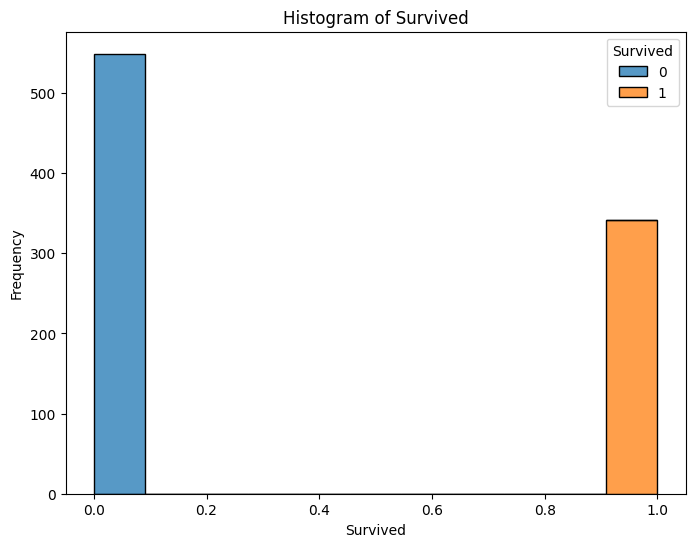

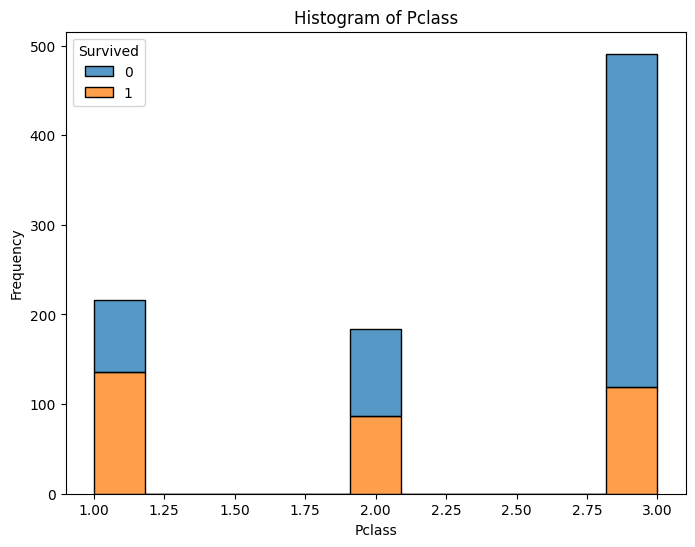

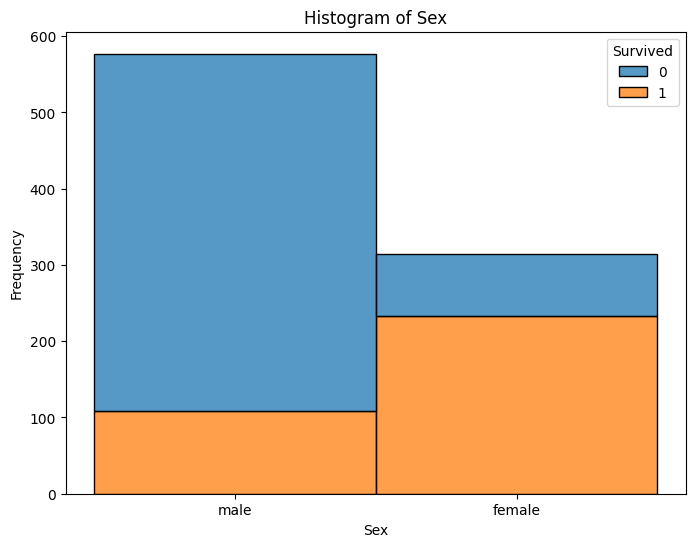

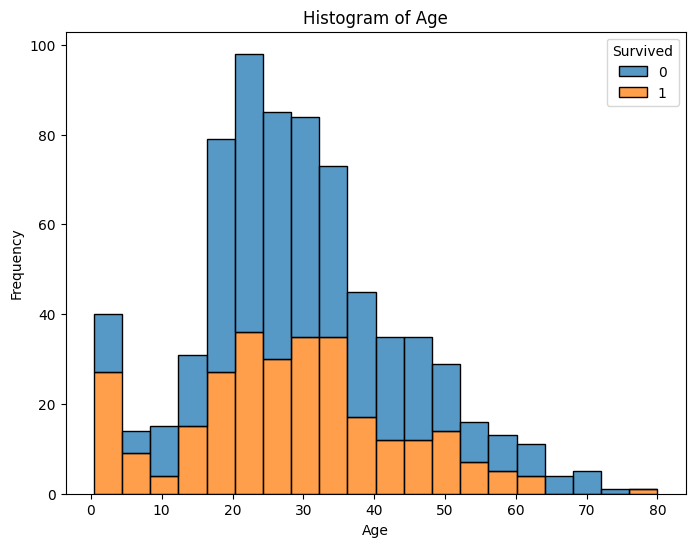

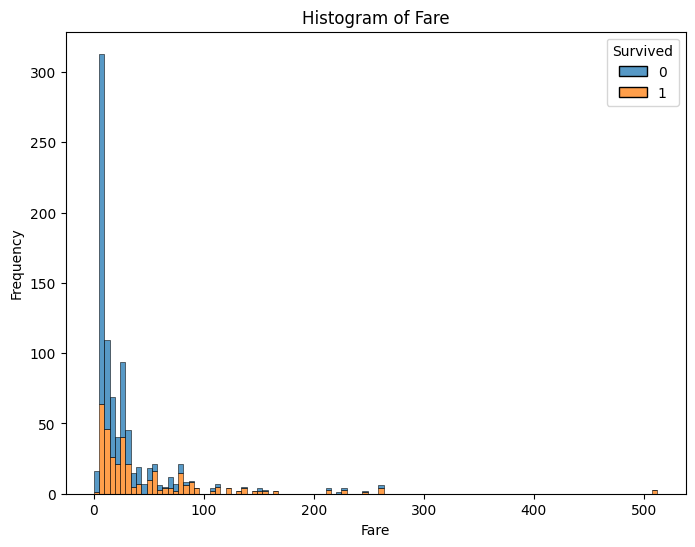

In [49]:
#Creamos histogramas los cuales den una reporesentacion visual de la cantidad de pasajeros que sobrevivieron 
#dependiendo de diferentes variables, esto permitiendonos ver si es que se tiene relacion entre la variable 
#y su probabilidad de sobrevivir
graficas = passengers.drop(columns= ['Cabin', 'Embarked', 'PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp'])
for col in graficas.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(passengers, x = col, hue = 'Survived', multiple='stack' )
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

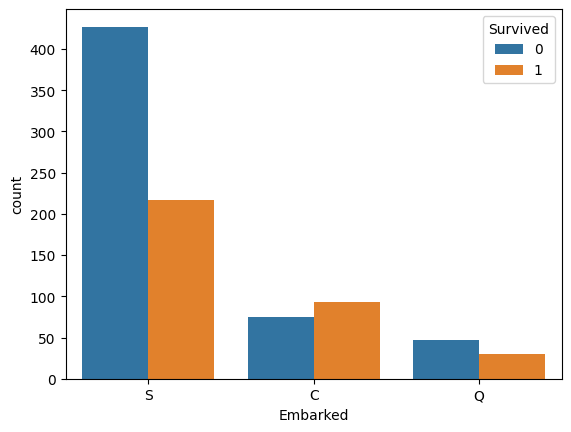

In [50]:
#Creamos una grafica la cual muestra la cantidad de pasajeros que lograron sobrevivir y los que no, 
#separados por la embarcacion por la cual accedieron al Titanic
sns.countplot(x = passengers['Embarked'], hue= passengers['Survived'])

In [51]:
#Le aplicamos un logaritmo a la variable Fare para normalizar la grafica, esto debido a que contaba con muchos datos
#atipicos e irregulares
passengers['Fare_Log'] = np.log(passengers['Fare']+1)

<Axes: xlabel='Fare_Log', ylabel='Count'>

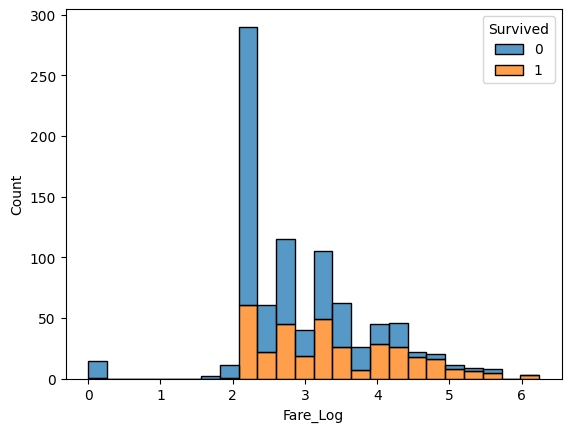

In [52]:
#Graficamos el histograma de la nueva variable que contiene el Fare con el logaritmo aplicado para 
#poder visualizar los cambios
sns.histplot(passengers, x = 'Fare_Log', hue = 'Survived', multiple = 'stack')

**2. Echemos un vistazo a la edad. Imprima passengers['Age'].values. Puede ver que tenemos varios valores faltantes, o nans. Rellene todos los valores de edad vacíos en pasajeros con valores dentro del rango según el título de cada pasajero.**

In [53]:
# Extraer títulos
def extract_title(name):
    parts = name.split(',')
    if len(parts) > 1:
        title = parts[1].split()[0]
        return title
    return None

passengers['Title'] = passengers['Name'].apply(extract_title)

passengers['Title'].value_counts() # Contar por títulos

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Mme.           1
Don.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [54]:
passengers[passengers['Age'].isna()].groupby('Title').size()

Title
Dr.          1
Master.      4
Miss.       36
Mr.        119
Mrs.        17
dtype: int64

In [55]:
# Media y Rangos
grouped = passengers.groupby('Title')

mean_ages = grouped['Age'].mean()
age_min = grouped['Age'].min()
age_max = grouped['Age'].max()

summary = pd.DataFrame({'Mean Age': mean_ages, 'Min Age': age_min, 'Max Age': age_max})
print(summary)

            Mean Age  Min Age  Max Age
Title                                 
Capt.      70.000000    70.00     70.0
Col.       58.000000    56.00     60.0
Don.       40.000000    40.00     40.0
Dr.        42.000000    23.00     54.0
Jonkheer.  38.000000    38.00     38.0
Lady.      48.000000    48.00     48.0
Major.     48.500000    45.00     52.0
Master.     4.574167     0.42     12.0
Miss.      21.773973     0.75     63.0
Mlle.      24.000000    24.00     24.0
Mme.       24.000000    24.00     24.0
Mr.        32.368090    11.00     80.0
Mrs.       35.898148    14.00     63.0
Ms.        28.000000    28.00     28.0
Rev.       43.166667    27.00     57.0
Sir.       49.000000    49.00     49.0
the        33.000000    33.00     33.0


In [56]:
original_ages = passengers['Age'].copy()

In [57]:
# Rellenar rango
def fill_na_with_random(passengers):
    titles = passengers['Title'].unique()  # Obtener todos los títulos únicos
    for title in titles:
        title_mask = passengers['Title'] == title  # Filtrar por título
        age_range = passengers.loc[title_mask, 'Age'].dropna()

        if not age_range.empty:
            min_age = age_range.min()
            max_age = age_range.max()

            # Generar edades aleatorias uniformemente distribuidas dentro del rango
            passengers.loc[title_mask & passengers['Age'].isna(), 'Age'] = passengers.loc[title_mask & passengers['Age'].isna(), 'Age'].apply(
                lambda x: random.uniform(min_age, max_age)
            )

fill_na_with_random(passengers)

C:\Users\erika\AppData\Local\Temp\ipykernel_3960\1189764023.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\erika\AppData\Local\Temp\ipykernel_3960\1189764023.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



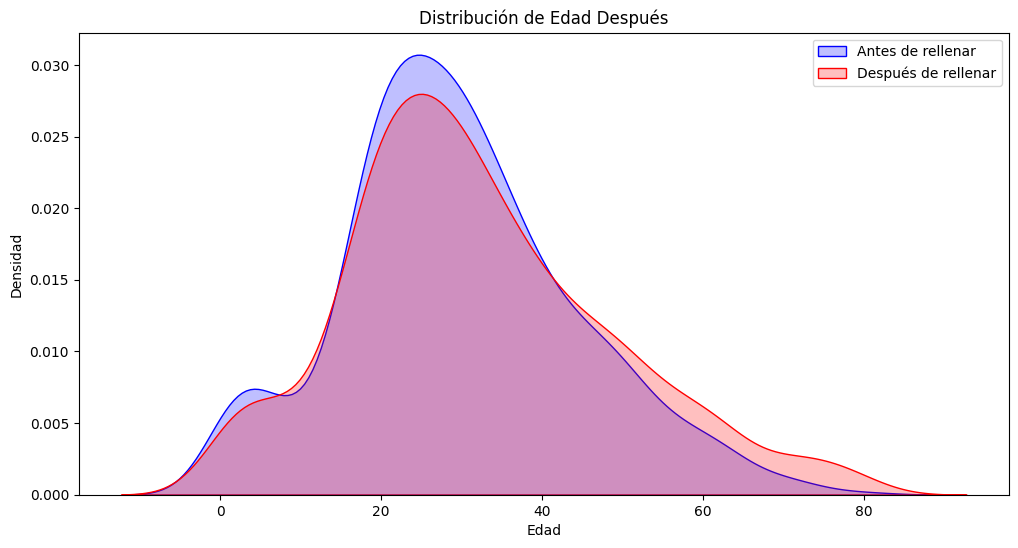

In [58]:
plt.figure(figsize=(12, 6))
sns.kdeplot(original_ages, color='blue', label='Antes de rellenar', shade=True)
sns.kdeplot(passengers['Age'], color='red', label='Después de rellenar', shade=True)
plt.title('Distribución de Edad Después')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

**3. Transformación de datos categóricos y eliminación de columnas**

Dado el dicho, "las mujeres y los niños primero", el sexo y la edad parecen ser buenas características para predecir la supervivencia. Mapeemos los valores de texto en la columna Sex a un valor numérico. Actualice 'Sex' de modo que todos los valores femeninos se reemplacen con 1 y todos los valores masculinos se reemplacen con 0.

In [59]:
passengers['Gender'] = passengers['Sex'].apply(lambda x: 1 if x == 'male' else 0) # male - 1  |  female - 0

In [60]:
dumm = pd.get_dummies(passengers["Embarked"], dtype ="int")
dumm

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [61]:
# C = Cherbourg, Q = Queenstown, S = Southampton
passengers = pd.concat([passengers.drop("Embarked", axis = 1), dumm], axis = 1)

In [62]:
Family = passengers["SibSp"]	+ passengers["Parch"]
passengers["Family"] = Family

In [63]:
data2 = passengers.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Sex", "Title", "SibSp", "Parch" ])

<Axes: >

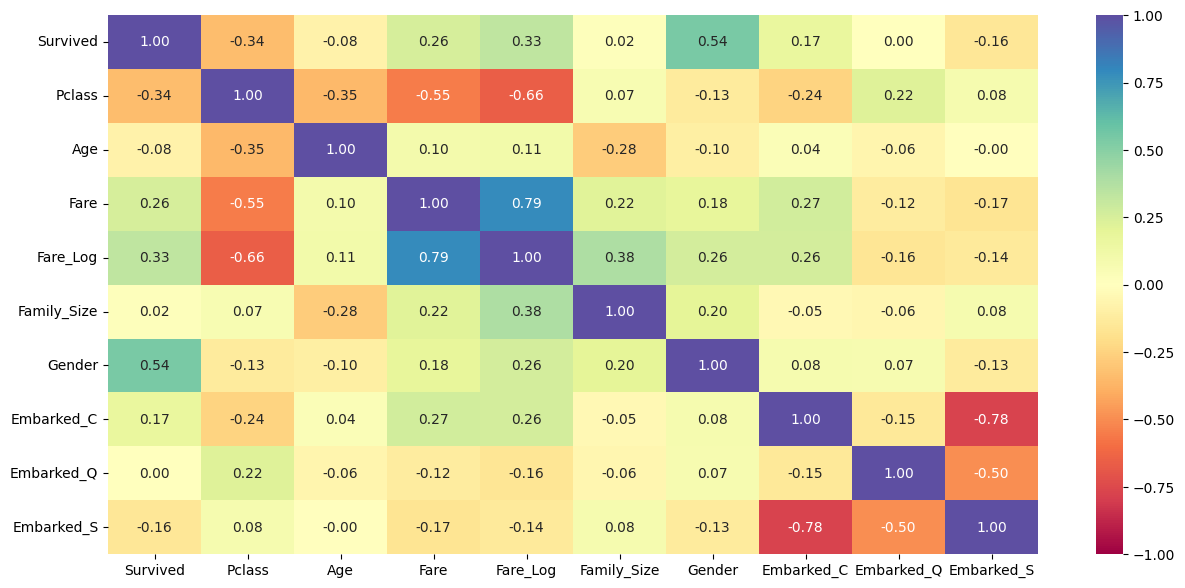

In [64]:
plt.figure(figsize = (15,7))
sns.heatmap(corr_data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

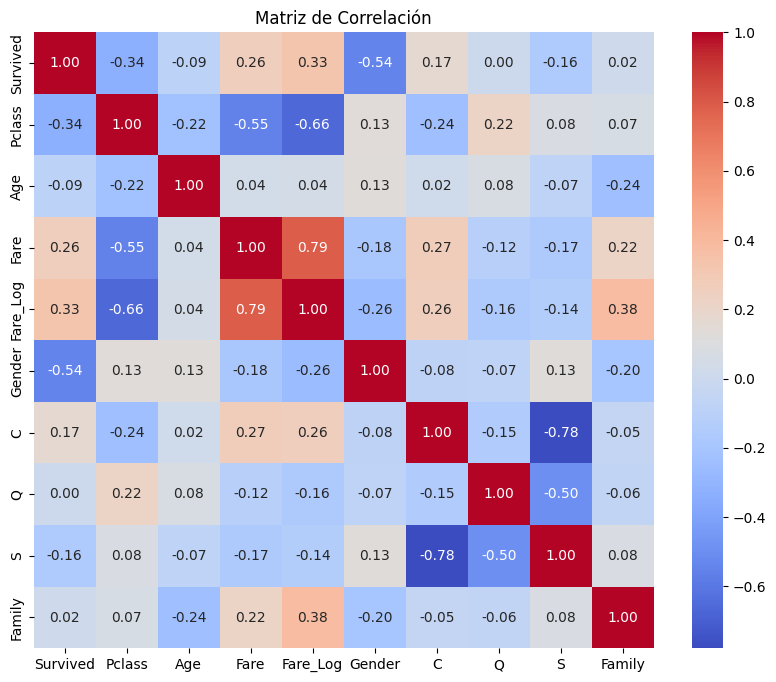

In [65]:
matrix = data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

**Survival Rate**

In [66]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
passengers['AgeRange'] = pd.cut(passengers['Age'], bins=age_bins, labels=age_labels, right=False)
survival_rate = passengers.groupby('AgeRange')['Survived'].mean()
print(survival_rate)
passengers = passengers.drop(columns="AgeRange")

AgeRange
0-10     0.637681
11-20    0.368000
21-30    0.341176
31-40    0.406250
41-50    0.353982
51-60    0.400000
61-70    0.285714
71-80    0.230769
Name: Survived, dtype: float64


C:\Users\erika\AppData\Local\Temp\ipykernel_3960\1887964750.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [67]:
survival_rate_embarked_S = passengers.groupby('S')['Survived'].mean()
print(survival_rate_embarked_S)
survival_rate_embarked_Q = passengers.groupby('Q')['Survived'].mean()
print(survival_rate_embarked_Q)
survival_rate_embarked_C = passengers.groupby('C')['Survived'].mean()
print(survival_rate_embarked_C)

S
0    0.506073
1    0.336957
Name: Survived, dtype: float64
Q
0    0.383292
1    0.389610
Name: Survived, dtype: float64
C
0    0.344398
1    0.553571
Name: Survived, dtype: float64


In [68]:
survival_rate_Gender = passengers.groupby('Gender')['Survived'].mean()
print(survival_rate_Gender)

Gender
0    0.742038
1    0.188908
Name: Survived, dtype: float64


Primer Modelo

Para este primer modelo usamos una regresión logistica de una sola variable, en este caso fue la de genero ya que tenia la mayor correlación con la supervivencia.

In [69]:
# Armar el primer modelo predictivo

# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [0,0]
theta_nuevo = theta.copy()
# Cargar el valor del learning rate (alpha)
alpha = 0.1

# Crear función lambda para la función de hipótesis
prediccion = lambda b,m,x: 1/(np.exp(-(b + m*x)))

# Calcular el total de muestras a partir de los datos (n)
n = len(passengers)

# Separar datos en grupo de entrenamiento y de prueba
np.random.seed(20)

# Revolver el dataframe
datos_revueltos = passengers.sample(frac=1).reset_index(drop=True)

# Indice para separar los datos
indice = int(n * 0.7)

# Separar en los dos grupos
training = datos_revueltos[:indice].copy()
test = datos_revueltos[indice:].copy()

In [70]:
i = 1
converge1 = 1
converge2 = 1
n = len(training)

# Se entrena el modelo hasta que los valores de theta converjan o hasta que se alcance el limite de iteraciones
while (converge1 > 1e-6 or converge2 > 1e-6) and i < 1000000:
  i = i + 1
  theta_nuevo[0] = theta[0] - alpha*(1/n)*np.sum(prediccion(theta[0], theta[1], training['Gender']) - training['Survived'])
  theta_nuevo[1] = theta[1] - alpha*(1/n)*np.sum((prediccion(theta[0], theta[1], training['Gender']) - training['Survived'])*training['Gender'])
  converge1 = abs(theta_nuevo[0] - theta[0])
  converge2 = abs(theta_nuevo[1] - theta[1])
  theta = theta_nuevo.copy()

print('Iteraciones:', i)
print('theta0 =', round(theta[0], 2))
print('theta1 =', round(theta[1], 2))

Iteraciones: 1166
theta0 = -0.3
theta1 = -1.32


In [71]:
# Se añade una columna para tener las predicciones
test['Prediccion'] = round(prediccion(theta[0], theta[1], test['Gender']))
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_Log,Title,Gender,C,Q,S,Family,Prediccion
623,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.000000,0,0,345364,6.2375,NaN,1.979276,Mr.,1,0,0,1,0,0.0
624,549,0,3,"Goldsmith, Mr. Frank John",male,33.000000,1,1,363291,20.5250,NaN,3.069215,Mr.,1,0,0,1,2,0.0
625,241,0,3,"Zabour, Miss. Thamine",female,16.855483,1,0,2665,14.4542,NaN,2.737881,Miss.,0,1,0,0,1,1.0
626,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,26.905518,1,0,PC 17604,82.1708,NaN,4.420896,Mrs.,0,1,0,0,1,1.0
627,449,1,3,"Baclini, Miss. Marie Catherine",female,5.000000,2,1,2666,19.2583,NaN,3.008565,Miss.,0,1,0,0,3,1.0


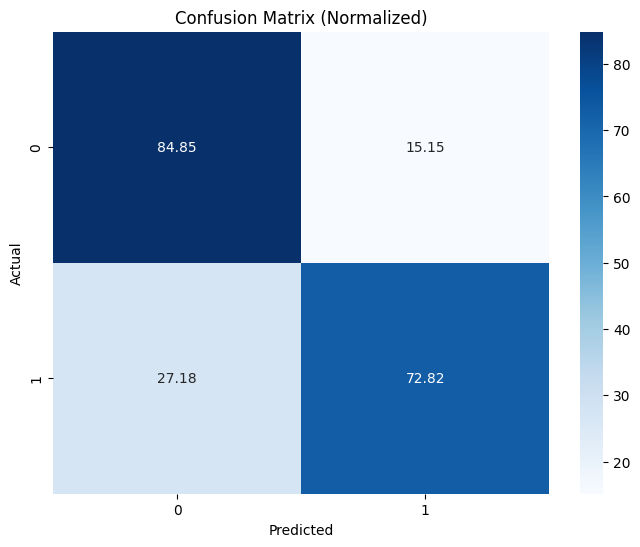

In [72]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
# Assuming y_true and y_pred are your actual and predicted values
cm = confusion_matrix(test['Survived'], test['Prediccion'])

# Normalize the confusion matrix to get percentages
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')
plt.show()

In [73]:
test_Titanic = pd.read_csv('test_Titanic.csv')
test_Titanic['Gender'] = test_Titanic['Sex'].map({'female': 1, 'male': 0})
test_Titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [74]:
kaggle_submit = test_Titanic[['PassengerId']].copy()
kaggle_submit['Survived'] = round(prediccion(theta[0], theta[1], test_Titanic['Gender'])).astype(int)
kaggle_submit.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
